# Andromeda -  Aristotle Space and Aeronautics Team - 2022

Launched at EUROC'22. Achieved an apogee above 3400 meters, and the flight was nominal.
Permission to use flight data given by Antoniadis Panos, 2024.

These results were extracted out of the flight card:

1. Team number: `4`
2. Launch date: `October 14th, 2022. around 14hrs local time`
3. Simulated apogee: `3614.95 m` 
4. Official recorded apogee: `3443 m`

The relative error of altitude apogee is only `4.99 %`!

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt

from rocketpy import Environment, Flight, Function, Rocket, SolidMotor

plt.style.use("seaborn-v0_8-colorblind")

## Environment registered by windy


Gravity Details

Acceleration of gravity at surface level:    9.8066 m/s²
Acceleration of gravity at   4.000 km (ASL): 9.8066 m/s²


Launch Site Details

Launch Date: 2022-10-14 13:00:00 UTC | 2022-10-14 14:00:00 Portugal
Launch Site Latitude: 39.38869°
Launch Site Longitude: -8.28781°
Reference Datum: WGS84
Launch Site UTM coordinates: 44507.97 W    4373270.52 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 160.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 4.000 km
Reanalysis Time Period: from 2022-10-13 10:00:00 to 2022-10-17 17:00:00 utc
Reanalysis Hour Interval: 2 hrs
Reanalysis Latitude Range: From 40.0° to 39.0°
Reanalysis Longitude Range: From -9.0° to -8.0°

Surface Atmospheric Conditions

Surface Wind Speed: 1.55 m/s
Surface Wind Direction: 309.52°
Surface Wind Heading: 129.52°
Surface Pressure: 1000.00 hPa
Surface Temperature: 298.89 K
Surface Air Density: 1.166 kg/m³
Surface Speed of Sound: 346.58 m/s


Earth Model

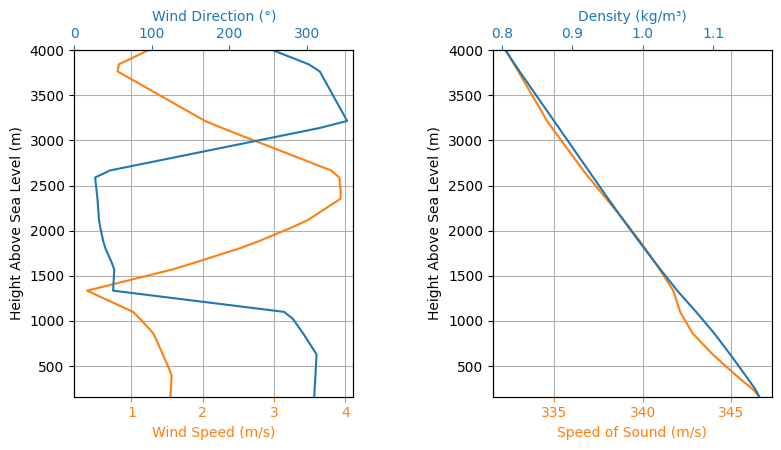

In [4]:
env = Environment(
    gravity=9.80665,
    date=(2022, 10, 14, 14),
    latitude=39.388692,
    longitude=-8.287814,
    elevation=160,
    datum="WGS84",
    timezone="Portugal",
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/euroc_2022_all_windows.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 4000
env.info()

## Motor

Notice that the thrust curve of the motor differs from the one given by Cesaroni. This data was obtained by the team, after testing. 

In [61]:
ProM2020 = SolidMotor(
    # thrust_source="../../data/motors/cesaroni/Cesaroni_8429M2020-P.eng",
    thrust_source="../../data/rockets/andromeda/thrust_curve.csv",
    burn_time=3.76,
    grain_number=1,
    grain_density=1468.9079097925262,
    grain_initial_inner_radius=0.01875,
    grain_outer_radius=0.0375,
    grain_initial_height=0.893,
    nozzle_radius=0.028125,
    nozzle_position=0,
    throat_radius=0.01875,
    grain_separation=0,
    grains_center_of_mass_position=0.5613903872259161,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0.5,
    dry_mass=0,
)

Nozzle Details
Nozzle Radius: 0.028125 m
Nozzle Throat Radius: 0.01875 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1468.9079097925262 kg/m3
Grain Outer Radius: 0.0375 m
Grain Inner Radius: 0.01875 m
Grain Height: 0.893 m
Grain Volume: 0.003 m3
Grain Mass: 4.346 kg

Motor Details
Total Burning Time: 3.76 s
Total Propellant Mass: 4.346 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 2270.131 m/s
Average Thrust: 2624.114 N
Maximum Thrust: 3347.670162 N at 1.106 s after ignition.
Total Impulse: 9866.669 Ns



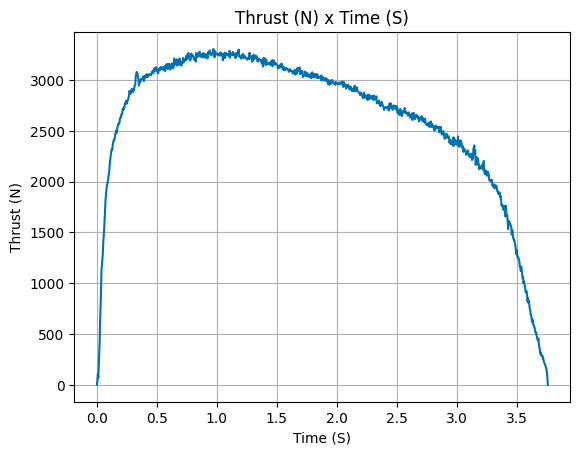

In [62]:
ProM2020.info()

## Rocket and Aerodynamic surfaces

In [63]:
Andromeda = Rocket(
    radius=0.07535,
    mass=20.9767,
    inertia=(11.249, 11.249, 0.12377),
    center_of_mass_without_motor=1.3998,
    power_off_drag="../../data/rockets/andromeda/drag_coefficient.csv",
    power_on_drag="../../data/rockets/andromeda/drag_coefficient.csv",
    coordinate_system_orientation="tail_to_nose",
)

Andromeda.set_rail_buttons(1.5998, 0.8998)

Andromeda.add_motor(ProM2020, position=0)

In [64]:
NoseCone = Andromeda.add_nose(
    length=0.3,
    kind="vonKarman",
    position=2.4996,
)

FinSet = Andromeda.add_trapezoidal_fins(
    n=3,
    span=0.185,
    root_chord=0.23,
    tip_chord=0.11,
    position=0.3546,
)

Drogue = Andromeda.add_parachute(
    "Drogue", cd_s=0.84665922014, trigger="apogee", sampling_rate=100, lag=0
)

Main = Andromeda.add_parachute(
    "Main", cd_s=8.362919643856031, trigger=500, sampling_rate=100, lag=0
)


Inertia Details

Rocket Mass: 20.977 kg (without motor)
Rocket Dry Mass: 20.977 kg (with unloaded motor)
Rocket Loaded Mass: 25.323 kg
Rocket Structural Mass Ratio: 0.828
Rocket Inertia (with unloaded motor) 11: 11.249 kg*m2
Rocket Inertia (with unloaded motor) 22: 11.249 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.124 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.07535 m
Rocket Frontal Area: 0.017837 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.400 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.838 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.144 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 9.255/rad

Center of Pressure



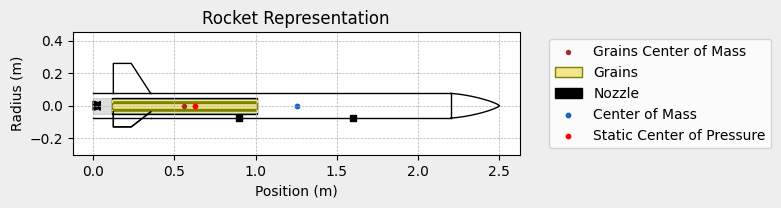

In [65]:
Andromeda.prints.all()
Andromeda.draw()

## Flight Simulation DATA

In [66]:
test_flight = Flight(
    rocket=Andromeda, environment=env, inclination=84, heading=133, rail_length=12
)


Apogee State

Apogee Time: 25.838 s
Apogee Altitude: 3774.946 m (ASL) | 3614.946 m (AGL)
Apogee Freestream Speed: 17.988 m/s
Apogee X position: 403.642 m
Apogee Y position: -405.426 m
Apogee latitude: 39.3850450°
Apogee longitude: -8.2831163°


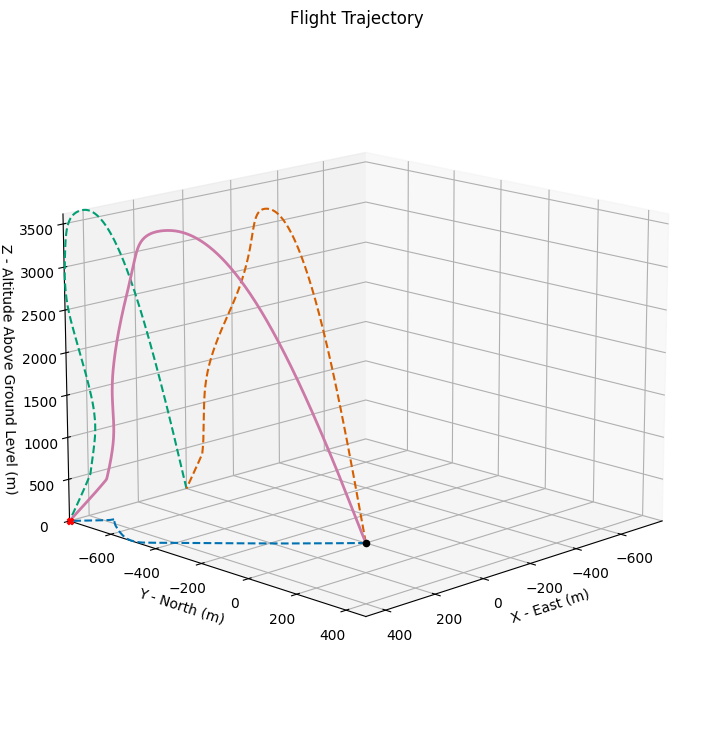

In [67]:
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()

## Data analysis

In [71]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter

columns_map = {
    "t(s)": "time",
    "alt(m)": "altitude",
    "vz(m/s)": "vz",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/rockets/andromeda/flight_data.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'vz']


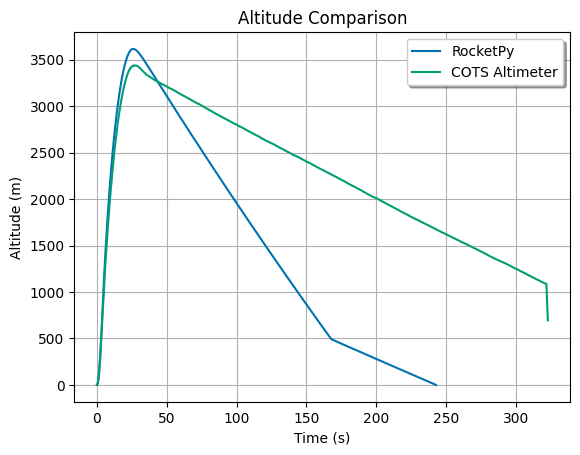

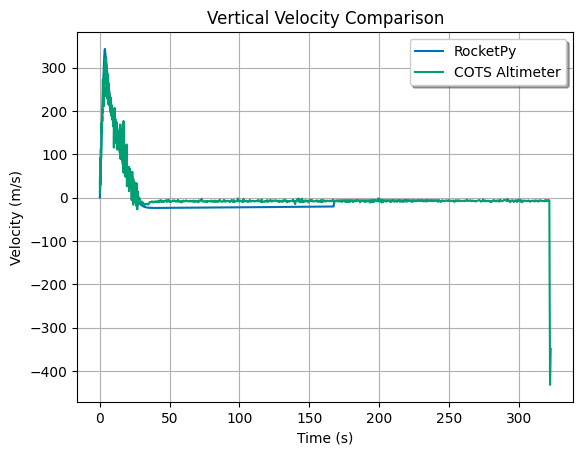

In [72]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
)

Function.compare_plots(
    [
        (test_flight.vz, "RocketPy"),
        (cots_altimeter_flight.vz, "COTS Altimeter"),
    ],
    title="Vertical Velocity Comparison",
    xlabel="Time (s)",
    ylabel="Velocity (m/s)",
)